# Task 1 - Clustering

In [1]:
import pandas as pd
import numpy as np

# dataset contains latin characters, use latin char-set
df = pd.read_csv('datasets/Spotify.csv', na_filter=False,  encoding='latin-1')

#df.info()

__Task 1.1. Data Preparation for Clustering__

In [2]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

#drop useless column
del df['Type']

# remove rows with invalid time signature
df = df[df.time_signature != 0]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

energy_dist = sns.distplot(df['Energy'].dropna())
#plt.show()
loudness_dist = sns.distplot(df['Loudness'].dropna())
#plt.show()
speech_dist = sns.distplot(df['Speechiness'].dropna())
#plt.show()
instrum_dist = sns.distplot(df['Instrumentalness'].dropna(), bins=20)
#plt.show()

2. What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice.

Energy, Loudness, Instrumentalness, Speechiness

__Task 1.2. The first clustering model__
1. Build a default clustering model with K= 3 and answer the followings:


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# use selected features
df2 = df[['Energy', 'Loudness', 'Speechiness', 'Instrumentalness']]

X = df2.values

X = StandardScaler().fit_transform(X)

rs = 10 # random state
k = 3# num of clusters

model = KMeans( n_clusters=k, random_state=rs ).fit(X)

print("\nsum of intra-cluster distance: ", model.inertia_ )

print("\nCentroid locations: ")
for centroid in model.cluster_centers_:
    print(centroid)

from collections import Counter, defaultdict
print("\n", Counter(model.labels_))


sum of intra-cluster distance:  3583.334837103983

Centroid locations: 
[-1.13445957 -1.1365255  -0.22089152  1.19013138]
[ 0.57072778  0.54430976 -0.16933934 -0.48311448]
[-1.08142314 -0.62585552  4.46299819 -0.79216197]

 Counter({1: 1784, 0: 794, 2: 107})


##### a. How many records are assigned into each cluster?
 Counter({0: 1784, 1: 794, 2: 107})
 


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

y = model.predict(X)
df2['Cluster_ID'] = y

# How many records are in each cluster
print ("Cluster membership")
print( df2['Cluster_ID'].value_counts() )

Cluster membership
1    1784
0     794
2     107
Name: Cluster_ID, dtype: int64


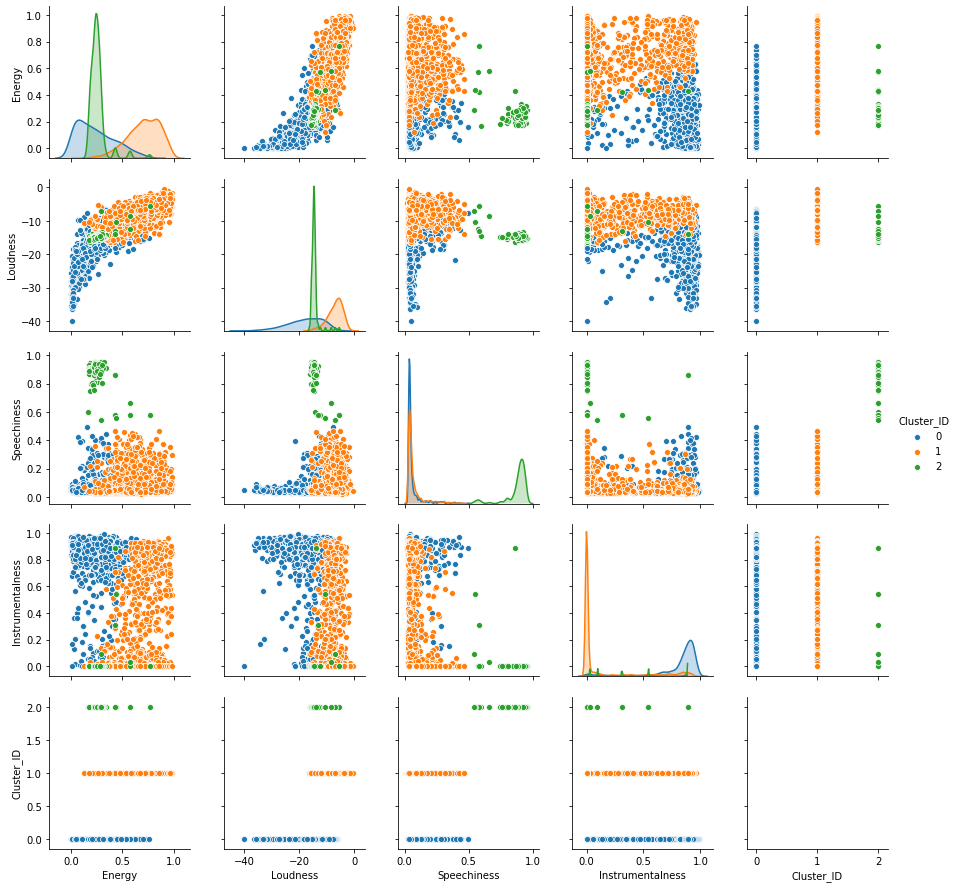

In [6]:
# pairplot the cluster distribution
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


sum of intra-cluster distance:  223.83048334294645

Centroid locations: 
[0.69868117 0.83226997 0.06013054 0.03825828]
[0.37450499 0.62712931 0.0474017  0.84314503]
[0.25145626 0.6439626  0.91425875 0.00560981]

 Counter({0: 1570, 1: 1009, 2: 106})
Cluster membership
0    1570
1    1009
2     106
Name: Cluster_ID, dtype: int64


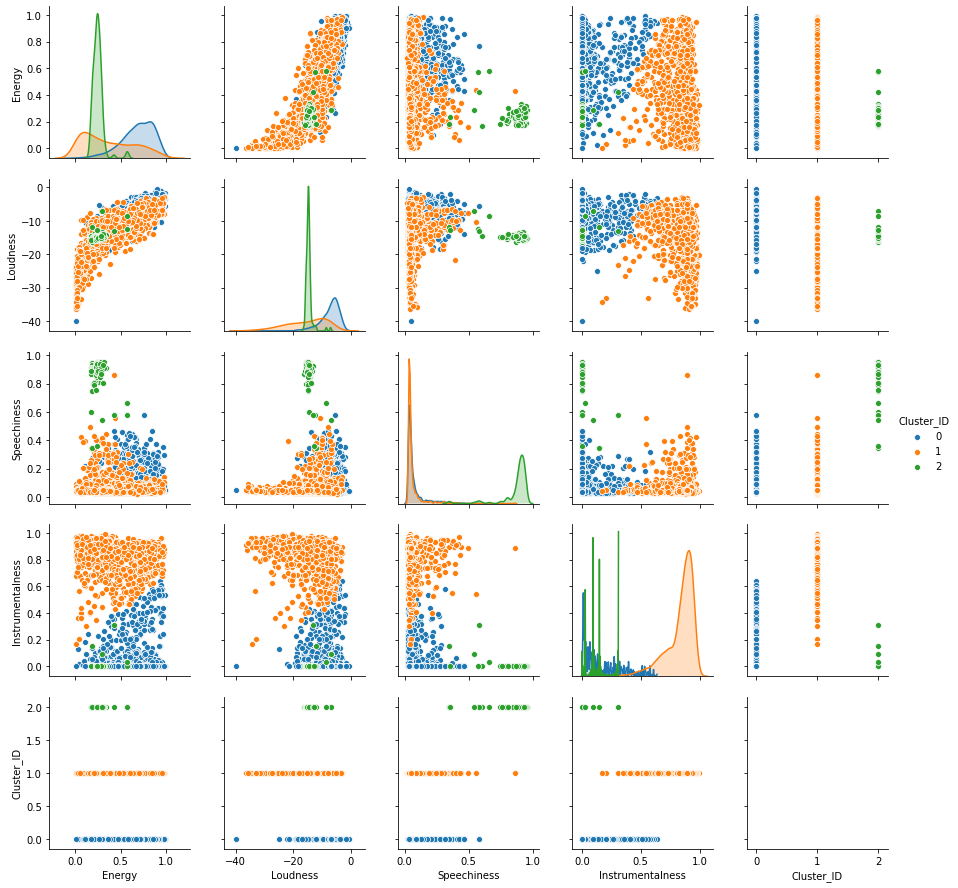

In [7]:
## AGAIN WITH NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# use selected features
df2 = df[['Energy', 'Loudness', 'Speechiness', 'Instrumentalness']]

X = df2.values

X = MinMaxScaler().fit_transform(X)

rs = 10 # random state
k = 3# num of clusters

model = KMeans( n_clusters=k, random_state=rs ).fit(X)

print("\nsum of intra-cluster distance: ", model.inertia_ )

print("\nCentroid locations: ")
for centroid in model.cluster_centers_:
    print(centroid)

from collections import Counter, defaultdict
print("\n", Counter(model.labels_))

import seaborn as sns
import matplotlib.pyplot as plt

y = model.predict(X)
df2['Cluster_ID'] = y

# How many records are in each cluster
print ("Cluster membership")
print( df2['Cluster_ID'].value_counts() )

# pairplot the cluster distribution
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

Distribution for cluster 0


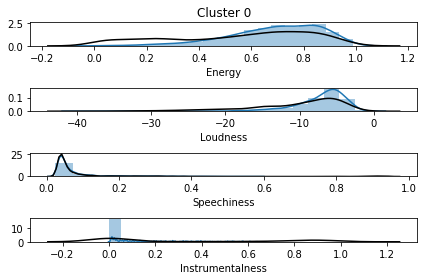

Distribution for cluster 1


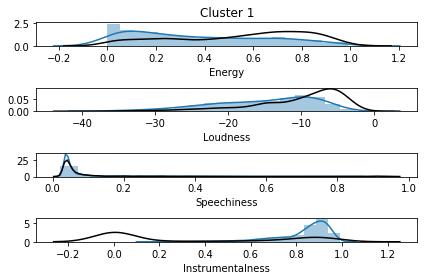

Distribution for cluster 2


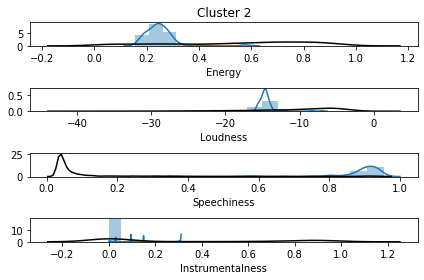

In [8]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['Energy', 'Loudness', 'Speechiness', 'Instrumentalness']
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=4)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

In [9]:
model = KMeans( n_clusters=5, random_state=rs ).fit(X)

print("\nsum of intra-cluster distance: ", model.inertia_ )

print("\nCentroid locations: ")
for centroid in model.cluster_centers_:
    print(centroid)

from collections import Counter, defaultdict
print("\n", Counter(model.labels_))


sum of intra-cluster distance:  102.05764334824198

Centroid locations: 
[0.8006551  0.8733754  0.05259528 0.01829557]
[0.1584034  0.51193383 0.04391094 0.8808641 ]
[0.25222407 0.64287746 0.92508094 0.00426329]
[0.66303969 0.77930084 0.05096944 0.7760101 ]
[0.49265556 0.75137992 0.07654269 0.04028946]

 Counter({0: 998, 1: 559, 4: 536, 3: 488, 2: 104})


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

y = model.predict(X)
df2['Cluster_ID'] = y

# How many records are in each cluster
print ("Cluster membership")
print( df2['Cluster_ID'].value_counts() )

Cluster membership
0    998
1    559
4    536
3    488
2    104
Name: Cluster_ID, dtype: int64


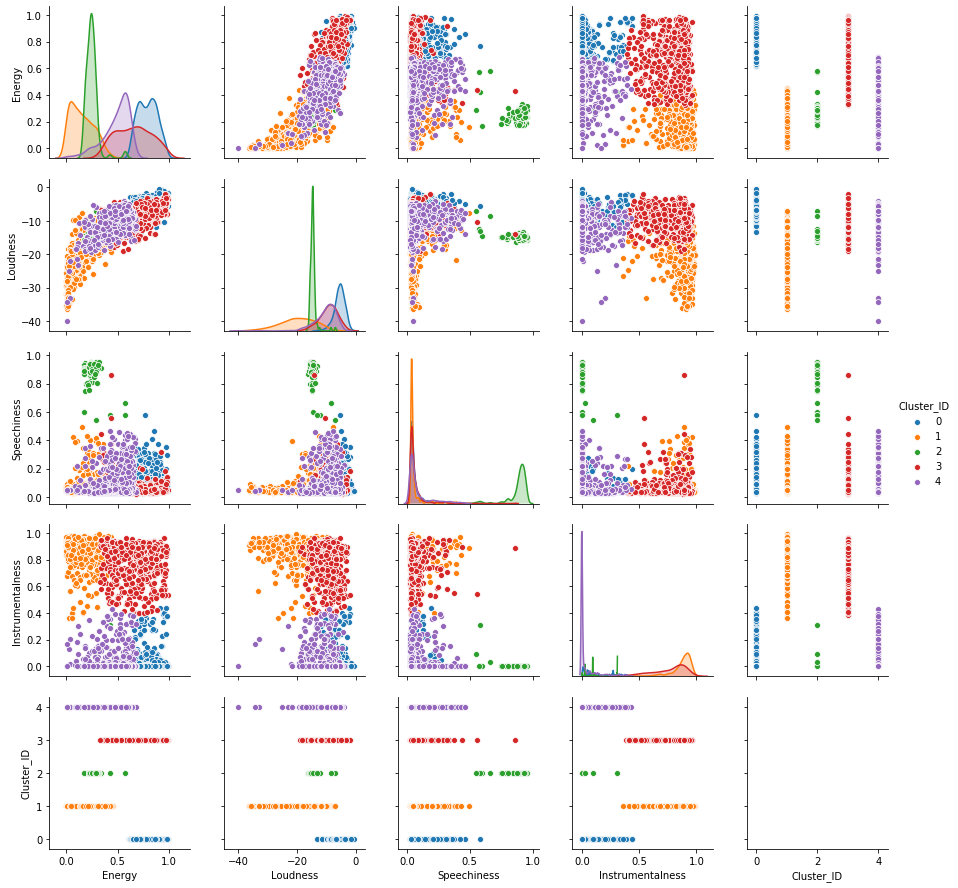

In [11]:
# pairplot the cluster distribution
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

## Task 1.3

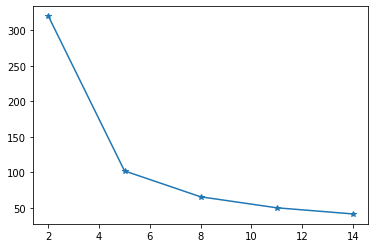

In [12]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
# this whole process should take a while
for k in range(2, 17, 3):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(2,17,3), inertia_vals, marker='*')
plt.show()

In [13]:
# 5 or 8
from sklearn.metrics import silhouette_score

print(clusters[1])
print("score for k=5: ", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("score for k=8: ", silhouette_score(X, clusters[2].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)
score for k=5:  0.47843051742090553
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)
score for k=8:  0.4065602579066744
